# Lab Cleaning Numerical Data

In [358]:
# For this lab, we will be using the dataset in the Customer Analysis Business Case. 
# This dataset can be found in files_for_lab folder.

## CONTEXT

In [359]:
# An auto insurance company has collected some data about its customers including 
# their demographics, education, employment, policy details, 
# vehicle information on which insurance policy is, and claim amounts. 

# You will help the senior management with some business questions 
# that will help them to better understand their customers, 
# improve their services, and improve profitability.

# Some business Objectives:

# Retain customers,
# Analyze relevant customer data,
# Develop focused customer retention programs.

# Based on the analysis, take targeted actions to increase profitable customer response, 
# retention, and growth.

## INSTRUCTIONS

In [360]:
# Task 1: Import the necessary libraries

In [361]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [362]:
# Task 2: Load the we_fn_use_c_marketing_customer_value_analysis.csv  

# Task 3: First look at its main features (head, shape, info).

In [363]:
data = pd.read_csv('we_fn_use_c_marketing_customer_value_analysis.csv')
data.head()

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


In [364]:
data.shape

(9134, 24)

In [365]:
data.info

<bound method DataFrame.info of      Customer       State  Customer Lifetime Value Response  Coverage  \
0     BU79786  Washington              2763.519279       No     Basic   
1     QZ44356     Arizona              6979.535903       No  Extended   
2     AI49188      Nevada             12887.431650       No   Premium   
3     WW63253  California              7645.861827       No     Basic   
4     HB64268  Washington              2813.692575       No     Basic   
...       ...         ...                      ...      ...       ...   
9129  LA72316  California             23405.987980       No     Basic   
9130  PK87824  California              3096.511217      Yes  Extended   
9131  TD14365  California              8163.890428       No  Extended   
9132  UP19263  California              7524.442436       No  Extended   
9133  Y167826  California              2611.836866       No  Extended   

     Education Effective To Date EmploymentStatus Gender  Income  ...  \
0     Bachelor    

In [366]:
data.dtypes

Customer                          object
State                             object
Customer Lifetime Value          float64
Response                          object
Coverage                          object
Education                         object
Effective To Date                 object
EmploymentStatus                  object
Gender                            object
Income                             int64
Location Code                     object
Marital Status                    object
Monthly Premium Auto               int64
Months Since Last Claim            int64
Months Since Policy Inception      int64
Number of Open Complaints          int64
Number of Policies                 int64
Policy Type                       object
Policy                            object
Renew Offer Type                  object
Sales Channel                     object
Total Claim Amount               float64
Vehicle Class                     object
Vehicle Size                      object
dtype: object

In [367]:
# Task 4: Rename the columns so they follow the PE8 (snake case) (lower_case_with_underscores)

In [368]:
cols = []
for column in data.columns:
    cols.append(column.lower().replace(' ','_'))
data.columns = cols

In [369]:
data.head()

,customer,state,customer_lifetime_value,response,coverage,education,effective_to_date,employmentstatus,gender,income,...,months_since_policy_inception,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


In [370]:
# Task 5: Change effective to date column to datetime format.

In [371]:
data['effective_to_date'] = pd.to_datetime(data.effective_to_date)

In [372]:
data.head()
data.shape

(9134, 24)

In [373]:
data = data.drop_duplicates()

In [374]:
data.shape
# No duplicates!

(9134, 24)

In [375]:
# Task 6: Define a function that differentiates between continuous and discrete variables. 
  # Hint: The number of unique values might be useful. 
  # Store continuous data into a continuous_df variable and do the same for discrete_df

In [376]:
# Continuous and discrete variables just exist in numerical data - therefore, we do an cat-num-split
datacat= data.select_dtypes(include=object)
datanum = data.select_dtypes(include=np.number)

In [377]:
datanum.nunique()

customer_lifetime_value          8041
income                           5694
monthly_premium_auto              202
months_since_last_claim            36
months_since_policy_inception     100
number_of_open_complaints           6
number_of_policies                  9
total_claim_amount               5106
dtype: int64

In [378]:
# Discrete data: is counted, cannot be divided, is distinct (number of dogs e.g.), graphed on bar graph
# Continuous data: is measured, can be divided infinitely (weight of the dog e.g.), graphed on hist

In [379]:
continuous_df = []
discrete_df = []

In [380]:
datanum.shape

(9134, 8)

In [381]:
continuous_df = []
discrete_df = []

def diff_connum(df, x):
    for i in df.columns:
        if len(df[i].unique()) <= x:
            discrete_df.append(i)
        else:
            continuous_df.append(i)
    print(discrete_df)
    print(continuous_df)
    
diff_connum(datanum, 100)

['months_since_last_claim', 'months_since_policy_inception', 'number_of_open_complaints', 'number_of_policies']
['customer_lifetime_value', 'income', 'monthly_premium_auto', 'total_claim_amount']


In [382]:
# Task 7: Plot a correlation matrix, comment what you see.

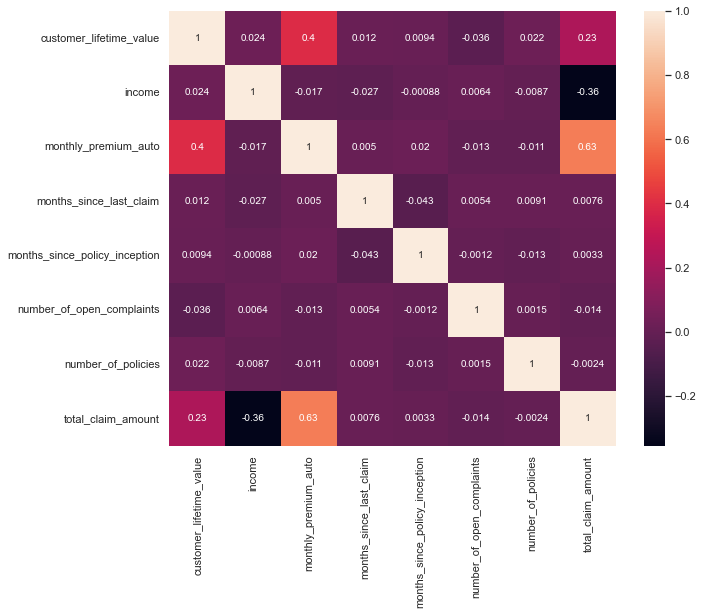

In [383]:
corr_matrix=datanum.corr(method='pearson')
fig, ax = plt.subplots(figsize=(10, 8))
ax = sns.heatmap(corr_matrix, annot=True)
plt.show()

In [384]:
# The correlation matrix shows a higher correlation between monthly_premium_auto and total_claim_amount (0,63) and 
# a correlation between monthly_premium_auto and customer_lifetime_value (0,4). 
# A lower correlation is also to find between customer_lifetime_value and total_claim_amount (0,36)
# We also have a negative correlation of -0,36 between income and total_claim_amount.
# All 4 of this correlations make sense.
# The other correlations are (positively and negatively) rather low (0,0x) and not significant.

In [385]:
# Task 8: Create a function to plot every discrete variable. 
  # Do the same with the continuous variables 
  # (Be Careful, you may need to change the plot type to one better suited for continuous data!)

# Task 9: Comment what you can see in the plots.

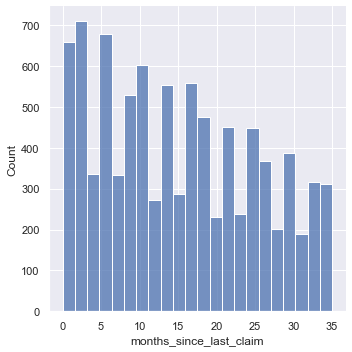

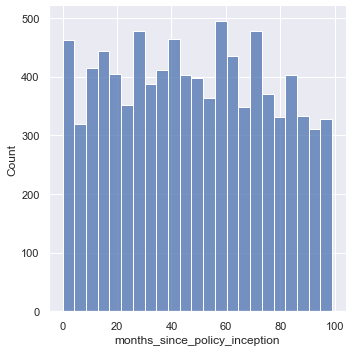

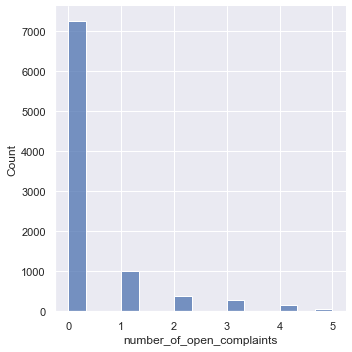

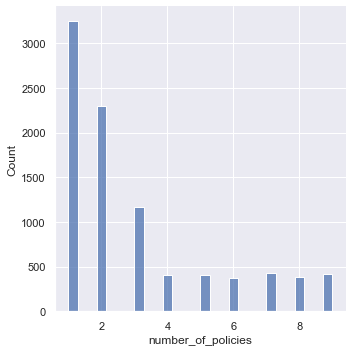

In [386]:
# Function for discrete variable:

def discrete_plot(df, x):
    for column in datanum[discrete_df]:
        sns.displot(datanum[column])
        plt.show()
discrete_plot(datanum, discrete_df)

In [387]:
# Plots for discrete variable:
# months_since_last_claim and months_since_policy_inception show an up-and-down (months_since_last_claim more), while

# number_of_open_complaints and number_of_policies are starting high and going down ascending.

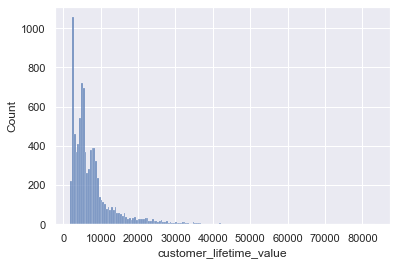

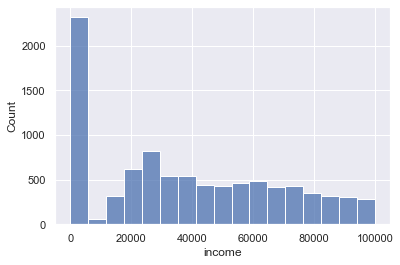

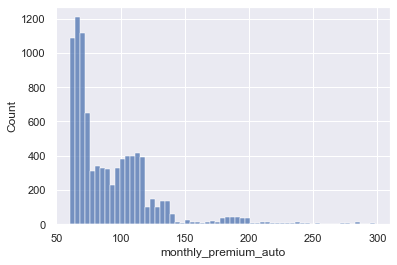

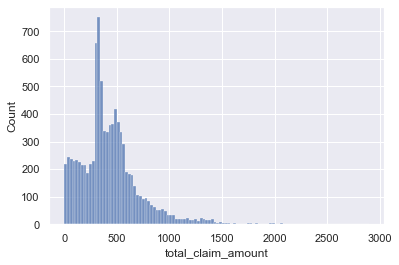

In [388]:
# Function for continuous variable:
def continuous_plot(df, x):
    for column in datanum[continuous_df]:
        sns.histplot(datanum[column])
        plt.show()
continuous_plot(datanum, continuous_df)

In [389]:
# Plots for continuous variable:
# All of the plots start high and going down ascending, but the maximum is on different spots:

# customer_lifetime_value have their highs till ca. 10000, then go down, from 25000 potentially outliers

# income have their high under 10000, then a very low, before it goes up again in some sort of normal distribution 
# (it would be interesting to know how the first high and the following low come from)

# monthly_premium_auto starts by around 60 with a high and goes down from there. 
# From around 200, it is very low, potentially outliers

# total_claim_amount starts by 0, has a max by around 250 and go down from there. from around 1500, it is very low,
# potentially outliers.

In [390]:
# Task 10: Look for outliers in the continuous variables. (HINT: There’s a good plot to do that!)
# Task 11: Did you find outliers? Comment what you will do with them.

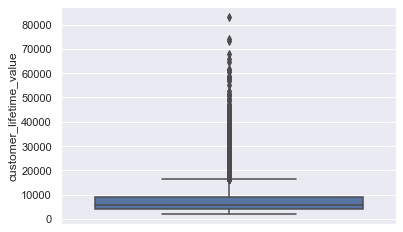

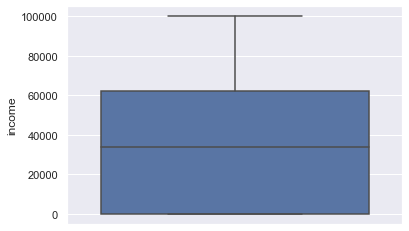

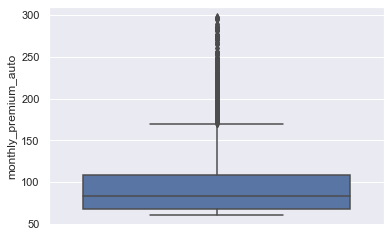

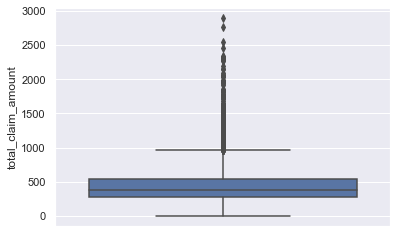

In [391]:
for column in datanum[continuous_df]:
    sns.boxplot(y=datanum[column])
    plt.show()

In [392]:
# Customer_lifetime_value: There are a number of values outside of the quantiles, from 70000 on I would call them outliers
# we have to deal with, meaning: we either delete them or we log them (idea: log till 70000, rest gets deleted)

# Income: doesn't seem to have any outliers

# monthly_premium_auto: has outliers outside of the quantiles, from 250 on I would check the amount of outliers in order
# to decide if I delete the outliers or if I log them in (here, I probably log them, seems to be many)

# total_claim_amount:has outliers from 2500 on - here, I would probably delete them (depending on the number of outliers) 

In [393]:
# Task 12: Check all columns for NaN values. 
  # Decide what (if anything) you will need to do with them.

In [394]:
datanum.isna().sum()

# No NaNs!

customer_lifetime_value          0
income                           0
monthly_premium_auto             0
months_since_last_claim          0
months_since_policy_inception    0
number_of_open_complaints        0
number_of_policies               0
total_claim_amount               0
dtype: int64

# Lab Cleaning Categorical Data

In [395]:
# For this lab, we will be using the dataset in the Customer Analysis Business Case. 
# This dataset can be found in files_for_lab folder. 
# In this lab we will explore categorical data.

## Instructions

In [396]:
# Task 1: Import the necessary libraries if you are starting a new notebook. 
 # Using the same data as the previous lab: we_fn_use_c_marketing_customer_value_analysis.csv
    
# Task 2: Find all of the categorical data. Save it in a categorical_df variable.

In [397]:
categorical_df = datacat

In [398]:
categorical_df.head()

,customer,state,response,coverage,education,employmentstatus,gender,location_code,marital_status,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size
0,BU79786,Washington,No,Basic,Bachelor,Employed,F,Suburban,Married,Corporate Auto,Corporate L3,Offer1,Agent,Two-Door Car,Medsize
1,QZ44356,Arizona,No,Extended,Bachelor,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer3,Agent,Four-Door Car,Medsize
2,AI49188,Nevada,No,Premium,Bachelor,Employed,F,Suburban,Married,Personal Auto,Personal L3,Offer1,Agent,Two-Door Car,Medsize
3,WW63253,California,No,Basic,Bachelor,Unemployed,M,Suburban,Married,Corporate Auto,Corporate L2,Offer1,Call Center,SUV,Medsize
4,HB64268,Washington,No,Basic,Bachelor,Employed,M,Rural,Single,Personal Auto,Personal L1,Offer1,Agent,Four-Door Car,Medsize


In [399]:
# Task 3: Check for NaN values.

In [400]:
categorical_df.isna().sum()

# No NaNs in the categorical data!

customer            0
state               0
response            0
coverage            0
education           0
employmentstatus    0
gender              0
location_code       0
marital_status      0
policy_type         0
policy              0
renew_offer_type    0
sales_channel       0
vehicle_class       0
vehicle_size        0
dtype: int64

In [401]:
# Task 4: Check all unique values of columns.

In [402]:
categorical_df.nunique()
categorical_df.shape

(9134, 15)

In [403]:
# Task 5: Check dtypes. Do they all make sense as categorical data?

In [404]:
categorical_df.dtypes

customer            object
state               object
response            object
coverage            object
education           object
employmentstatus    object
gender              object
location_code       object
marital_status      object
policy_type         object
policy              object
renew_offer_type    object
sales_channel       object
vehicle_class       object
vehicle_size        object
dtype: object

In [405]:
# customer is object, but has 9134 values - so just unique ones. That is not good for categorical data.
# Because we can't use customers for our models either, we can drop the column

In [406]:
categorical_df= categorical_df.drop(['customer'], axis = 1)
categorical_df.head()

,state,response,coverage,education,employmentstatus,gender,location_code,marital_status,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size
0,Washington,No,Basic,Bachelor,Employed,F,Suburban,Married,Corporate Auto,Corporate L3,Offer1,Agent,Two-Door Car,Medsize
1,Arizona,No,Extended,Bachelor,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer3,Agent,Four-Door Car,Medsize
2,Nevada,No,Premium,Bachelor,Employed,F,Suburban,Married,Personal Auto,Personal L3,Offer1,Agent,Two-Door Car,Medsize
3,California,No,Basic,Bachelor,Unemployed,M,Suburban,Married,Corporate Auto,Corporate L2,Offer1,Call Center,SUV,Medsize
4,Washington,No,Basic,Bachelor,Employed,M,Rural,Single,Personal Auto,Personal L1,Offer1,Agent,Four-Door Car,Medsize


In [407]:
# Besides customer, it all looks good, I would keep the categorical data - none of them seem to make sense as numerical
# (especially given the fact that the unique value numbers are not high for any categorical number)

In [408]:
# Task 6: Does any column contain alpha and numeric data? Decide how to clean it.

In [409]:
categorical_df.head(50)
categorical_df.tail(50)

,state,response,coverage,education,employmentstatus,gender,location_code,marital_status,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size
9084,California,No,Extended,High School or Below,Unemployed,F,Suburban,Single,Personal Auto,Personal L2,Offer1,Agent,Four-Door Car,Medsize
9085,California,No,Basic,High School or Below,Unemployed,F,Suburban,Divorced,Corporate Auto,Corporate L3,Offer3,Branch,SUV,Medsize
9086,California,No,Basic,Bachelor,Unemployed,M,Suburban,Married,Personal Auto,Personal L2,Offer3,Call Center,SUV,Large
9087,California,No,Premium,Master,Employed,F,Urban,Married,Personal Auto,Personal L2,Offer2,Branch,Four-Door Car,Medsize
9088,California,Yes,Premium,College,Unemployed,M,Suburban,Married,Personal Auto,Personal L3,Offer1,Branch,Four-Door Car,Large
9089,California,No,Basic,College,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer1,Branch,Two-Door Car,Small
9090,California,No,Premium,Bachelor,Employed,M,Suburban,Married,Corporate Auto,Corporate L1,Offer1,Branch,Four-Door Car,Large
9091,California,No,Basic,College,Employed,F,Suburban,Married,Personal Auto,Personal L3,Offer4,Branch,Four-Door Car,Large
9092,California,No,Basic,Bachelor,Medical Leave,F,Suburban,Married,Personal Auto,Personal L2,Offer2,Agent,Four-Door Car,Medsize
9093,California,No,Basic,College,Employed,M,Urban,Married,Personal Auto,Personal L1,Offer2,Web,Two-Door Car,Medsize


In [410]:
# 2 columns containing alpha and numeric data:
# a) policy b) renew_offer_type 

In [411]:
# Potential cleaning of column policy:
categorical_df['policy'].value_counts(dropna=False)

Personal L3     3426
Personal L2     2122
Personal L1     1240
Corporate L3    1014
Corporate L2     595
Corporate L1     359
Special L2       164
Special L3       148
Special L1        66
Name: policy, dtype: int64

In [412]:
# We can reduce the number of categories by bringen Personal, Corporate and Special together:

def clean(x):
    if x in ['Personal L1', 'Personal L2', 'Personal L3']:
        return 'Personal'
    elif x.startswith('C'):
        return 'Corporate'
    else:
        return 'Special'

categorical_df['policy'] = list(map(clean, categorical_df['policy']))

categorical_df['policy'].unique() 

array(['Corporate', 'Personal', 'Special'], dtype=object)

In [413]:
# Potential cleaning of column renew_offer_type:
categorical_df['renew_offer_type'].value_counts(dropna=False)

Offer1    3752
Offer2    2926
Offer3    1432
Offer4    1024
Name: renew_offer_type, dtype: int64

In [414]:
# We could rename the values with 1,2,3,4:
categorical_df['renew_offer_type'].replace({'Offer1': '1', 'Offer2': '2', 'Offer3': '3', 'Offer4': '4'}, inplace=True)
categorical_df['renew_offer_type'].value_counts(dropna=False)

1    3752
2    2926
3    1432
4    1024
Name: renew_offer_type, dtype: int64

In [415]:
# Task 7: Would you choose to do anything else to clean or wrangle the categorical data? 
          # Comment your decisions.

In [416]:
# We checked already for duplicates and NaNs - so it is not a cleaning step here anymore.

In [417]:
categorical_df['state'].value_counts(dropna=False)
# 5 values for states, all seem important --> keep

categorical_df['response'].value_counts(dropna=False)
# just 2 values --> keep

categorical_df['coverage'].value_counts(dropna=False)
# 3 values, all seem important --> keep

categorical_df['education'].value_counts(dropna=False)
# 5 values for education, could reduce the number --> Highschool or Below, College&Bachelor, Master or Above

categorical_df['employmentstatus'].value_counts(dropna=False)
# 5 values, 3 of them rather small, could reduce to 3 --> Employed, Unemployed, not working for other reasons

categorical_df['gender'].value_counts(dropna=False)
# 2 values --> keep

categorical_df['location_code'].value_counts(dropna=False)
# 3 values, all seem very distinct and unique --> keep

categorical_df['marital_status'].value_counts(dropna=False)
# 3 values  all seem distinct --> we don't have to change it but maybe --> delete (doesn't seem important)

categorical_df['policy_type'].value_counts(dropna=False)
# 3 values, excactly the same as policy after cleaning --> delete (because it is redundant)

categorical_df['policy'].value_counts(dropna=False)
# 3 values, excactly the same as policy after cleaning --> keep (the other one gets deleted)

categorical_df['renew_offer_type'].value_counts(dropna=False)
# 3 values, all distinct --> keep

categorical_df['sales_channel'].value_counts(dropna=False)
# 4 values, not sure how distinct --> we could keep it or reduce in Agent & Branch, Call Center & Web

categorical_df['vehicle_class'].value_counts(dropna=False)
# 6 values, seem very close to each other --> I don't know much about cars, but we could concat Luxury SUV and Luxury Car
# --> reduced to 5 values

categorical_df['vehicle_size'].value_counts(dropna=False)
# 3 values, all distinct --> keep


Medsize    6424
Small      1764
Large       946
Name: vehicle_size, dtype: int64

In [418]:
# Task 8: Compare policy_type and policy. 
# What information is contained in these columns. Can you identify what is important?

In [419]:
# After changing the values in policy_type (see Task 6), the values of policy and policy_type is identical.
# Therefore, I suggested in Task 7 to drop one of the columns, because we don't need the same information twice.

In [420]:
# Task 9: Check number of unique values in each column, 
        # can they be combined in any way to ease encoding? 
        # Comment your thoughts and make those changes.

In [421]:
# I did the suggestions for change already in Task 7 for every categorical column.
# Here, I am going to make those changes one by one for the columns I decided to work on.

In [422]:
# columns where I decided to reduce the number of values: employmentstatus, education, sales_channel, vehicle_class

In [423]:
#employmentstatus:

def clean2(x):
    if x in ['Employed']:
        return 'Employed'
    elif x in ['Unemployed']:
        return 'Unemployed'
    else:
        return 'not working for other reasons'

categorical_df['employmentstatus'] = list(map(clean2, categorical_df['employmentstatus']))

categorical_df['employmentstatus'].unique() 

array(['Employed', 'Unemployed', 'not working for other reasons'],
      dtype=object)

In [424]:
#education:

def clean3(x):
    if x in ['High School or Below']:
        return 'High School or Below'
    elif x in ['Bachelor', 'College']:
        return 'College or Bachelor'
    else:
        return 'Master or Above'

categorical_df['employmentstatus'] = list(map(clean3, categorical_df['education']))

categorical_df['employmentstatus'].unique() 

array(['College or Bachelor', 'Master or Above', 'High School or Below'],
      dtype=object)

In [425]:
#sales_channel:

def clean4(x):
    if x in ['Agent', 'Branch']:
        return 'Agent and Branch'
    else:
        return 'Call Center and Web'

categorical_df['sales_channel'] = list(map(clean4, categorical_df['sales_channel']))

categorical_df['sales_channel'].unique() 

array(['Agent and Branch', 'Call Center and Web'], dtype=object)

In [426]:
#vehicle_class:

def clean5(x):
    if x in ['Luxury SUV', 'Luxury Car']:
        return 'Luxury'
    else:
        return x

categorical_df['vehicle_class'] = list(map(clean5, categorical_df['vehicle_class']))

categorical_df['vehicle_class'].unique() 

array(['Two-Door Car', 'Four-Door Car', 'SUV', 'Luxury', 'Sports Car'],
      dtype=object)

In [431]:
# columns to drop: marital_status, policy_type

categorical_df = categorical_df.drop(['policy_type', 'marital_status'], axis = 1)
categorical_df.head()

,state,response,coverage,education,employmentstatus,gender,location_code,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size
0,Washington,No,Basic,Bachelor,College or Bachelor,F,Suburban,Corporate,1,Agent and Branch,Two-Door Car,Medsize
1,Arizona,No,Extended,Bachelor,College or Bachelor,F,Suburban,Personal,3,Agent and Branch,Four-Door Car,Medsize
2,Nevada,No,Premium,Bachelor,College or Bachelor,F,Suburban,Personal,1,Agent and Branch,Two-Door Car,Medsize
3,California,No,Basic,Bachelor,College or Bachelor,M,Suburban,Corporate,1,Call Center and Web,SUV,Medsize
4,Washington,No,Basic,Bachelor,College or Bachelor,M,Rural,Personal,1,Agent and Branch,Four-Door Car,Medsize


# Lab Feature Extraction

In [432]:
# Task 1: Open the categoricals variable we created before.
categorical_df.head()

,state,response,coverage,education,employmentstatus,gender,location_code,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size
0,Washington,No,Basic,Bachelor,College or Bachelor,F,Suburban,Corporate,1,Agent and Branch,Two-Door Car,Medsize
1,Arizona,No,Extended,Bachelor,College or Bachelor,F,Suburban,Personal,3,Agent and Branch,Four-Door Car,Medsize
2,Nevada,No,Premium,Bachelor,College or Bachelor,F,Suburban,Personal,1,Agent and Branch,Two-Door Car,Medsize
3,California,No,Basic,Bachelor,College or Bachelor,M,Suburban,Corporate,1,Call Center and Web,SUV,Medsize
4,Washington,No,Basic,Bachelor,College or Bachelor,M,Rural,Personal,1,Agent and Branch,Four-Door Car,Medsize


In [429]:
# Task 2: Plot all the categorical variables with the proper plot. What can you see?

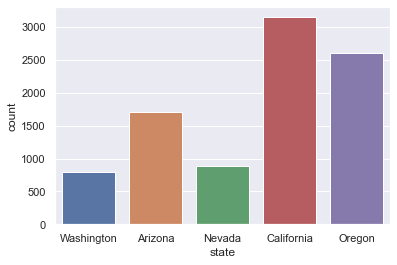

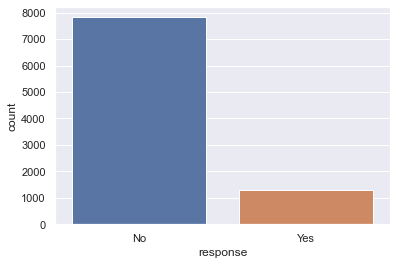

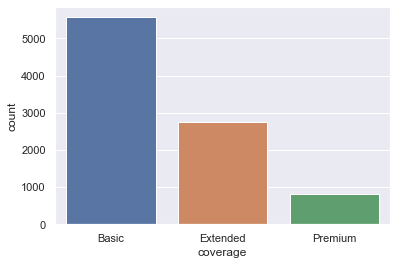

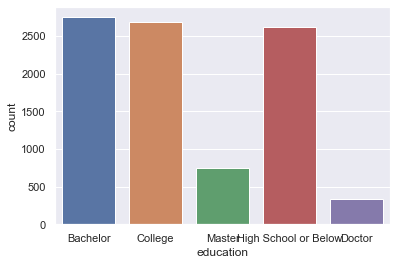

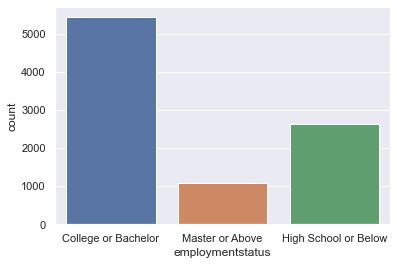

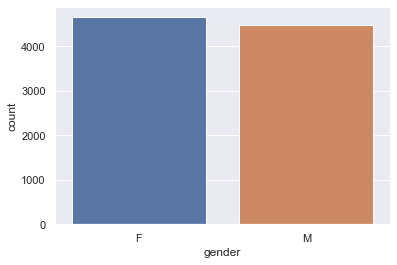

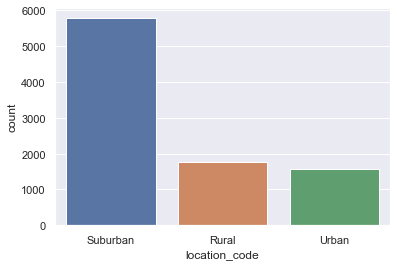

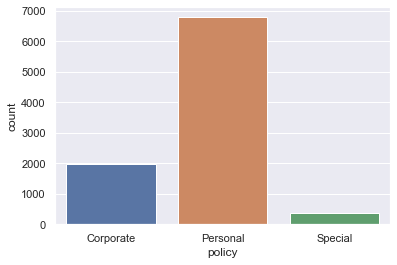

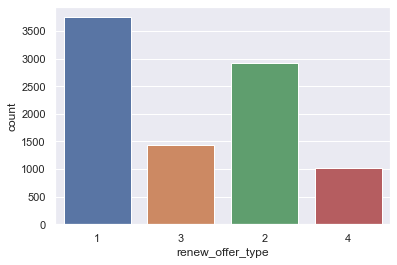

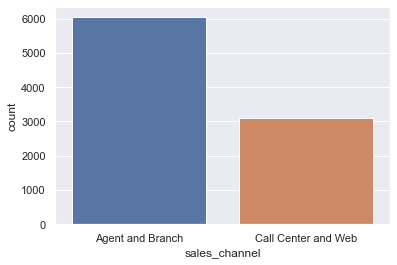

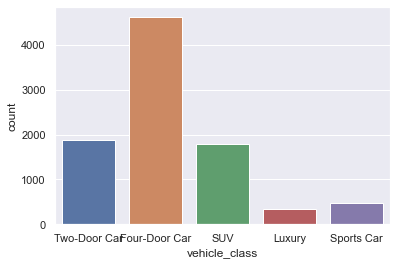

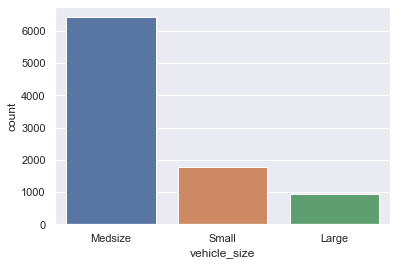

In [433]:
for column in categorical_df.columns:
    sns.countplot(x=categorical_df[column])
    plt.show()

In [ ]:
# state: the 5 values are a bit unbalanced.
# response: the  2 values are very imbalanced - we should work on that in case we use it for a model.
# coverage: the 3 values are imbalanced - we should work on that in case we use it in a model.
# education: the 3 values are imbalances - we should work on that in case we use it in a model.
# gender: the 2 values are balanced.
# location_code: the 3 values are imbalanced (2 similar, one way bigger) - maybe we have to work on that as well.
# policy: the 3 values are highly imbalanced - we have to work on that in case we use it in a model.
# renew_offer_type: the 4 values are imbalanced - we may have to work on that in case we use it in a model.
# sales_channel: the 2 values are imbalanced - we may have to work on that in case we use it in a model.
# vehicle_class: the 5 values are very imbalanced - we have to work on that in case we use it in a model.
# vehicle_size: the 3 values are very imbalanced - we have to work on that in case we use it in a model.

In [ ]:
# Task 3: There might be some columns that seem to be redundant, check their values to be sure. 
 # What should we do with them?

In [ ]:
# I did that step at the Lab before (see above) -
# I deleted the columns customer, marital_status (no valueable information) & policy_type (redundant)

In [ ]:
# Task 4: Plot time variable. Can you extract something from it?

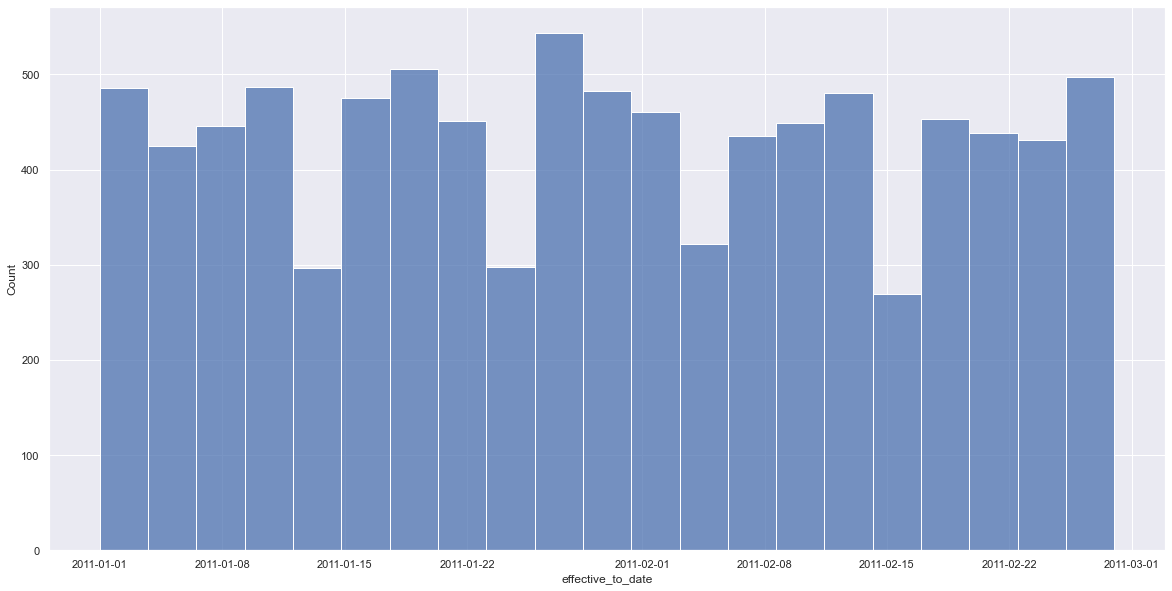

In [435]:
sns.histplot(data['effective_to_date'])
plt.show()
sns.set(rc = {'figure.figsize':(25,10)})

In [ ]:
# By looking into the plot, we see that the count number is high on the beginning, the middle and the end of the months
# (we see January and February 2011)
# Possible reason for that: the insurance policies become effective to date more often at fixed dates 
# (beginning, middle and end of of the months) - fitting to the payment intervalls in the US. 